In [1]:
import pandas as pd

birddata = pd.read_csv('bird_tracking.csv')

In [2]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [3]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
ix = birddata.bird_name == 'Eric'

In [6]:
x, y = birddata.longitude[ix], birddata.latitude[ix]

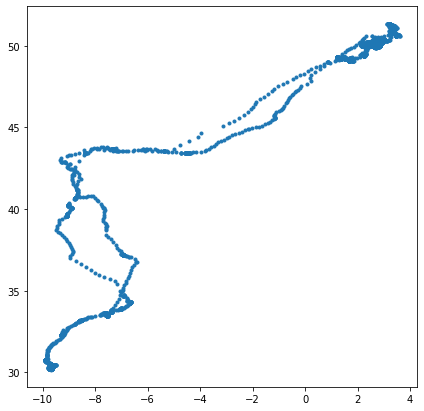

In [7]:
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

In [8]:
bird_names = pd.unique(birddata.bird_name)

In [9]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

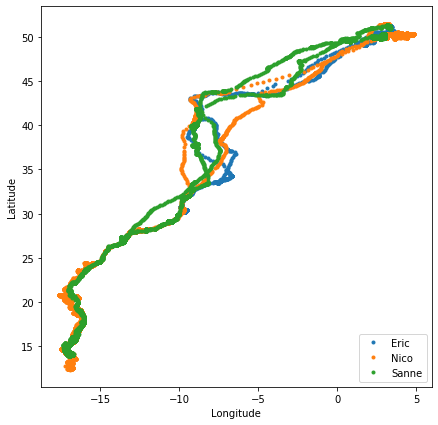

In [10]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

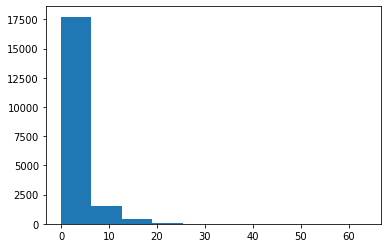

In [11]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Frequency')

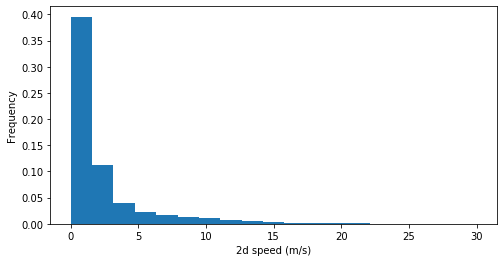

In [12]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == 'Eric']
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), normed=True)
plt.xlabel('2d speed (m/s)')
plt.ylabel('Frequency')

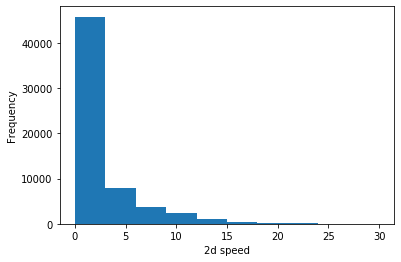

In [13]:
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel('2d speed')
plt.savefig('pd_hist.pdf')

In [14]:
import datetime as dt

In [15]:
dt.datetime.today()

datetime.datetime(2020, 4, 2, 12, 32, 43, 688624)

In [16]:
dt.datetime(2016, 2, 22, 15, 14, 34, 994336)

datetime.datetime(2016, 2, 22, 15, 14, 34, 994336)

In [17]:
time_1 = dt.datetime.today()
time_2 = dt.datetime.today()

time_2 - time_1

datetime.timedelta(0)

In [18]:
time_2 = dt.datetime.today()

time_2 - time_1

datetime.timedelta(microseconds=367866)

In [19]:
date_str = birddata.date_time[0]

In [20]:
type(date_str)

str

In [21]:
date_str

'2013-08-15 00:18:08+00'

In [22]:
date_str[:-3]

'2013-08-15 00:18:08'

In [23]:
date = dt.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')

In [24]:
birddata['timestamp'] = birddata['date_time'].apply(lambda d: dt.datetime.strptime(d[:-3], '%Y-%m-%d %H:%M:%S'))

In [25]:
birddata.timestamp[10] - birddata.timestamp[9]

Timedelta('0 days 00:15:51')

In [26]:
times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]

In [27]:
elapsed_time[8000]

Timedelta('105 days 13:41:04')

In [28]:
elapsed_time[8000] / dt.timedelta(days=1)

105.57018518518518

In [29]:
elapsed_time[8000] / dt.timedelta(minutes=1)

152021.06666666668

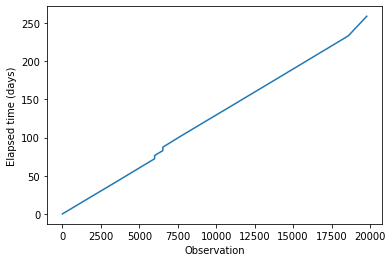

In [30]:
plt.plot(np.array(elapsed_time) / dt.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed time (days)')
plt.savefig('timeplit.pdf')

In [31]:
data = birddata[birddata.bird_name=='Eric']
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / dt.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

Text(0, 0.5, 'Mean speed (m/s)')

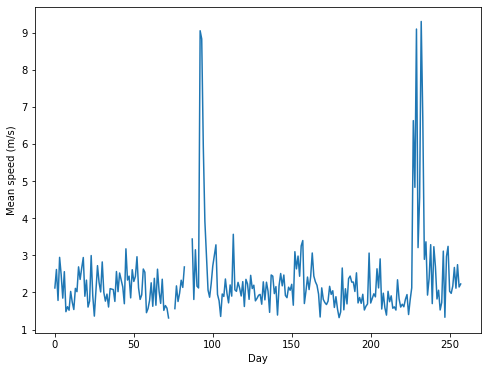

In [32]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)')

In [33]:
data = birddata[birddata.bird_name=='Sanne']

In [34]:
data.timestamp.min()

Timestamp('2013-08-15 00:01:08')

Instalando cartopy

In [35]:
conda install -c conda-forge cartopy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - cartopy


The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [36]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    owslib-0.19.2              |             py_1         131 KB
    pyshp-2.1.0                |             py_0          34 KB
    ------------------------------------------------------------
                                           Total:         165 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                       conda-forge --> pkgs/main
  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/main::conda-4.8.3-py37_0
  owslib                                        conda-forge --> pkgs/main
  pyepsg              conda-forge/noarch::pyepsg-0.4.0-py_0 --> pkgs/main/win-64::pyepsg-0.4.0-py37_0
  pykdtree           conda-f

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

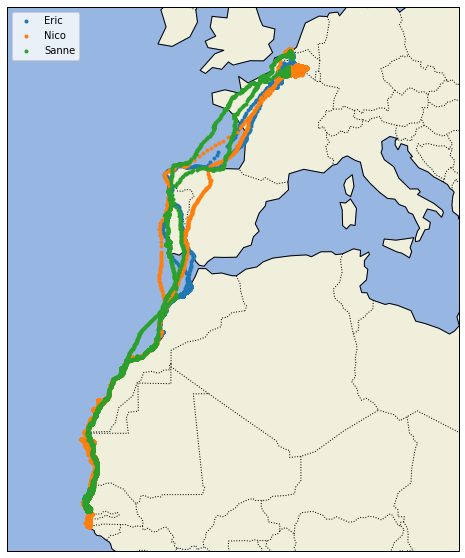

In [42]:
proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc='upper left')
plt.savefig('map.pdf')